# 高斯低通滤波器

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [2]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [3]:
def freqfilter_guassian_lp_kernel(M,N,D0):
    u = np.arange(-M//2,M//2)
    v = np.arange(-N//2,N//2)
    [U,V] = np.meshgrid(u,v)
    D = np.sqrt((U - M // 2) ** 2+(V - N // 2) ** 2)
    eps = 1.0e-5
    H = 1.0 - np.exp(-D ** 2 / 2.0 / D0 / D0)
    return H

'''
% 高斯低通滤波器gaussian
% input:
%     M,N:频域滤波器的尺寸
%     D0：带阻滤波器的截止频率
%     n ：阶次
% output:
%       H：M x N的矩阵，表示频域滤波器矩阵，数据类型为double
'''
def freqfilter_gaussian_Lp(im,D0):
    srcf = im.astype('float32') / 255.0
    imfft = np.fft.fft2(srcf)
    imfftshift = np.fft.fftshift(imfft)
    
    rows,cols = src.shape[0],src.shape[1]
    n1 = rows // 2
    n2 = cols // 2
    
    H = freqfilter_guassian_lp_kernel(cols,rows,D0)
    result = imfftshift * H
    result = np.fft.ifftshift(result)
    result = np.fft.ifft2(result)
    dst = np.abs(result)
    
#     dst[dst < 0] = 0
#     dst[dst > 0] = 255
#     dst = dst.astype(np.uint8)
    return dst

In [4]:
src = cv2.cvtColor(cv2.imread('../../datas/f3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [5]:
D0 = 10; # 阻止的频率点与频域中心的距离
W = 10;  # 带宽

In [6]:
rows,cols = gray.shape
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255

src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

src_noise[src_noise < 0] = 0
src_noise[src_noise > 255] = 255
src_noise = src_noise.astype(np.uint8)

In [7]:
r = freqfilter_gaussian_Lp(src[:,:,0],D0)
g = freqfilter_gaussian_Lp(src[:,:,1],D0)
b = freqfilter_gaussian_Lp(src[:,:,2],D0)

In [8]:
dst = cv2.merge([r,g,b])
dst = dst*255
dst[dst < 0] = 0
dst[dst > 255] = 255
dst = dst.astype(np.uint8)

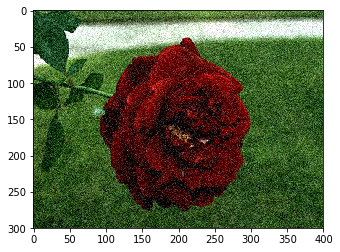

In [9]:
plt.imshow(src_noise)

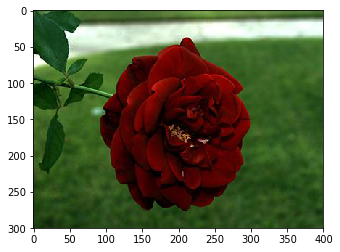

In [10]:
plt.imshow(dst)